# Classification binaire 
Nous allons comparer 4 algorthimes en effectuant une classifcation sur le dataset Breast Cancer. 
algorithmes utilisé :
* Régression logistique
* Arbre de decision
* Random Forest
* k-neighbor classification
## Imports

In [3]:
#manipulation de données
import pandas as pd
import numpy as np
#visualisation de données
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#outils ML 
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Modèle ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#Métriques d'évaluations
from sklearn.metrics import (confusion_matrix, classification_report)

#ignorer les warnings
import warnings
warnings.filterwarnings('ignore')

## Chargement et préparatio des données 

In [5]:
# Chargement du dataset
bunch = load_breast_cancer()

# Création d'un DataFrame pour les features
X = pd.DataFrame(bunch.data, columns=bunch.feature_names)

# Création d'une Series pour la target
# Conversion des valeurs numériques
y = pd.Series(bunch.target, name='diagnosis').map(dict(enumerate(bunch.target_names)))

# Fusion des features et de la target dans un seul DataFrame
df = pd.concat([X, y], axis=1)

# Stockage des noms des features et des classes
target_names = bunch.target_names

## Exploration des données 

In [6]:
#5 premières lignes du df 
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


<Axes: >

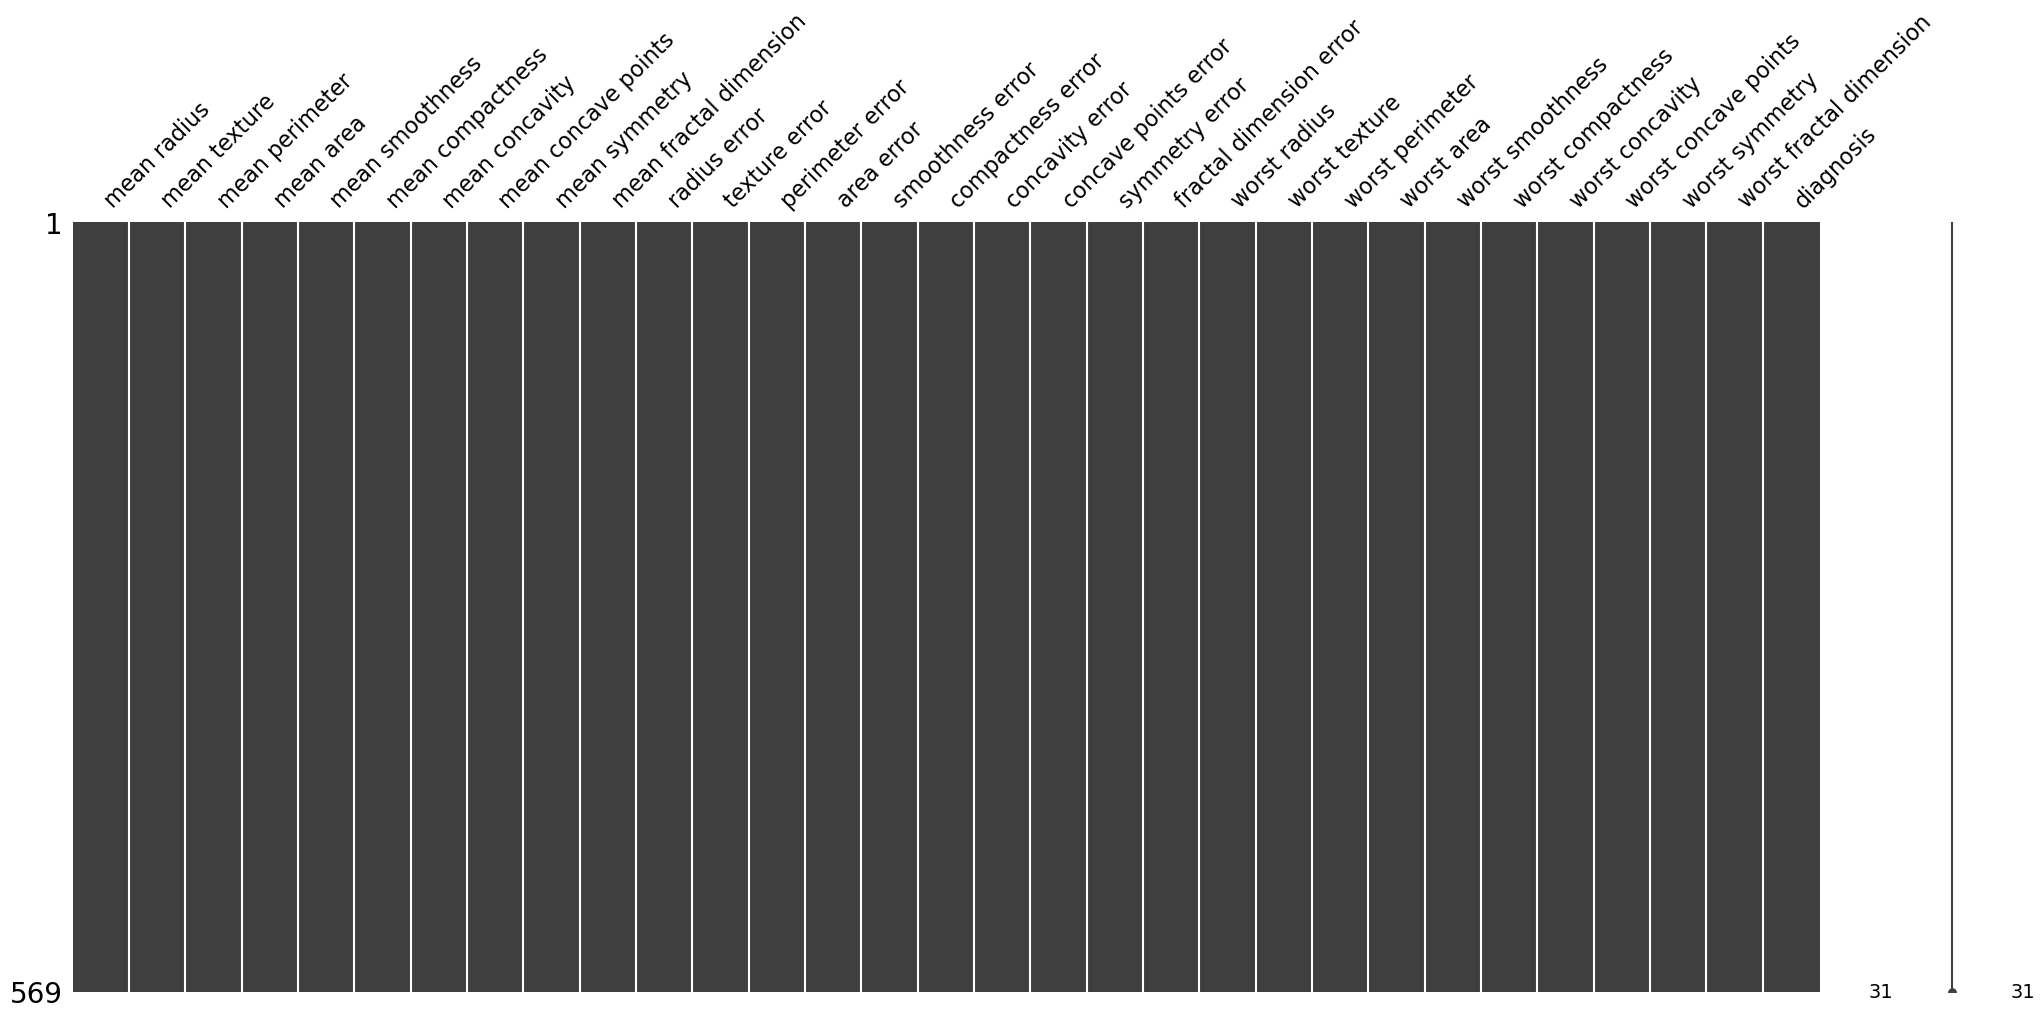

In [7]:
#visualiser les valeurs manquantes 
msno.matrix(df)

Le dataset ne contient pas de valeurs manquantes 

In [8]:
#nombre d'échantillons par classe
df['diagnosis'].value_counts()

diagnosis
benign       357
malignant    212
Name: count, dtype: int64

classes déséquilibrés

## Séparation train/ test 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, #30% des données sont pour tester les modèle 
    random_state=42, #reproductibilité des résultats
    shuffle=True, # mélange les données avant séparation
    stratify=y #garantit les même proportions de classes dans train et test
)

## Modèles de classification 

In [10]:
def classification(X_train, X_test, y_train, y_test):
    """
    Fonction pour entraîner et évaluer plusieurs modèles de classification
    """
    #dictionnaire contenant les modeles 
    model = {'logistic_reg' : LogisticRegression(),
            'k_nearest' : KNeighborsClassifier(),
            'desicion_tree' : DecisionTreeClassifier(),
            'random_forest' : RandomForestClassifier()
            }

    for a, b in model.items(): 
        print(f'¤{a}') #afficher le nom du modèle
        b.fit(X_train, y_train) #compiler le modèle
        y_pred = b.predict(X_test) #prédiction

        #visualisation des métriques 
        print('\n RAPPORT DE CLASSIFICATION\n')
        print(classification_report(y_test, y_pred, target_names=target_names))
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=target_names, yticklabels=target_names,
                    cbar_kws={'label': 'Nombre de prédictions'}, 
                    linewidths=2, linecolor='white')
        plt.title('Matrice de confusion', fontsize=14, fontweight='bold')
        plt.ylabel('Vraie classe', fontsize=12)
        plt.xlabel('Classe prédite', fontsize=12)
        plt.tight_layout()
        plt.show()

¤logistic_reg

 RAPPORT DE CLASSIFICATION

              precision    recall  f1-score   support

   malignant       0.92      0.98      0.95       107
      benign       0.96      0.86      0.91        64

    accuracy                           0.94       171
   macro avg       0.94      0.92      0.93       171
weighted avg       0.94      0.94      0.93       171



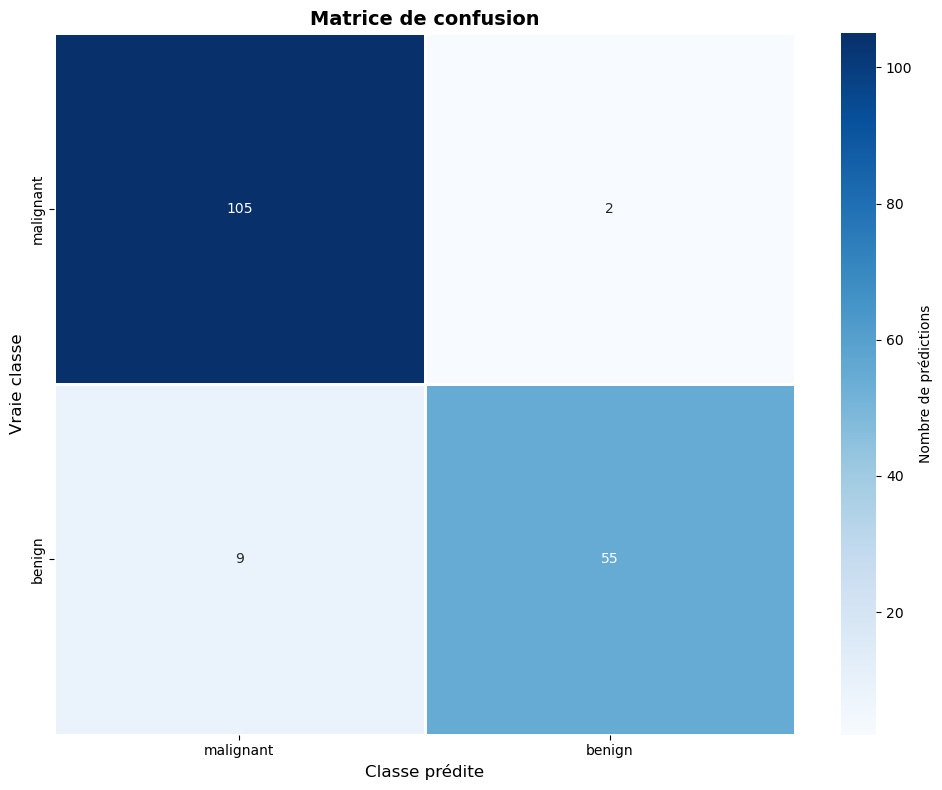

¤k_nearest

 RAPPORT DE CLASSIFICATION

              precision    recall  f1-score   support

   malignant       0.91      0.99      0.95       107
      benign       0.98      0.83      0.90        64

    accuracy                           0.93       171
   macro avg       0.94      0.91      0.92       171
weighted avg       0.93      0.93      0.93       171



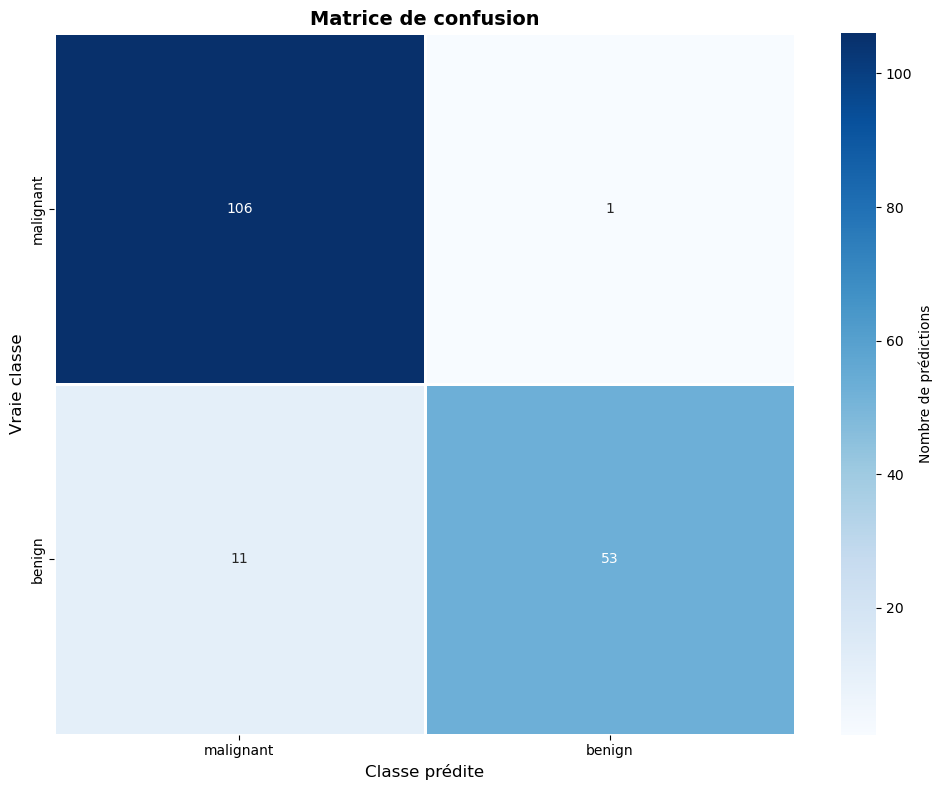

¤desicion_tree

 RAPPORT DE CLASSIFICATION

              precision    recall  f1-score   support

   malignant       0.89      0.93      0.91       107
      benign       0.88      0.81      0.85        64

    accuracy                           0.89       171
   macro avg       0.89      0.87      0.88       171
weighted avg       0.89      0.89      0.89       171



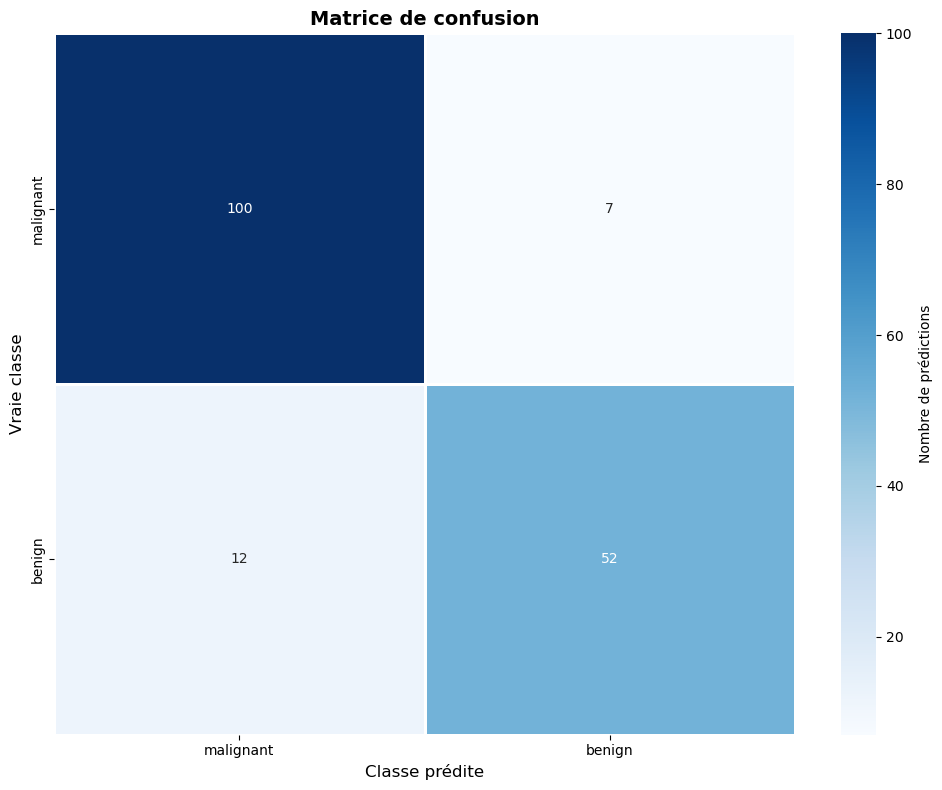

¤random_forest

 RAPPORT DE CLASSIFICATION

              precision    recall  f1-score   support

   malignant       0.95      1.00      0.97       107
      benign       1.00      0.91      0.95        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171



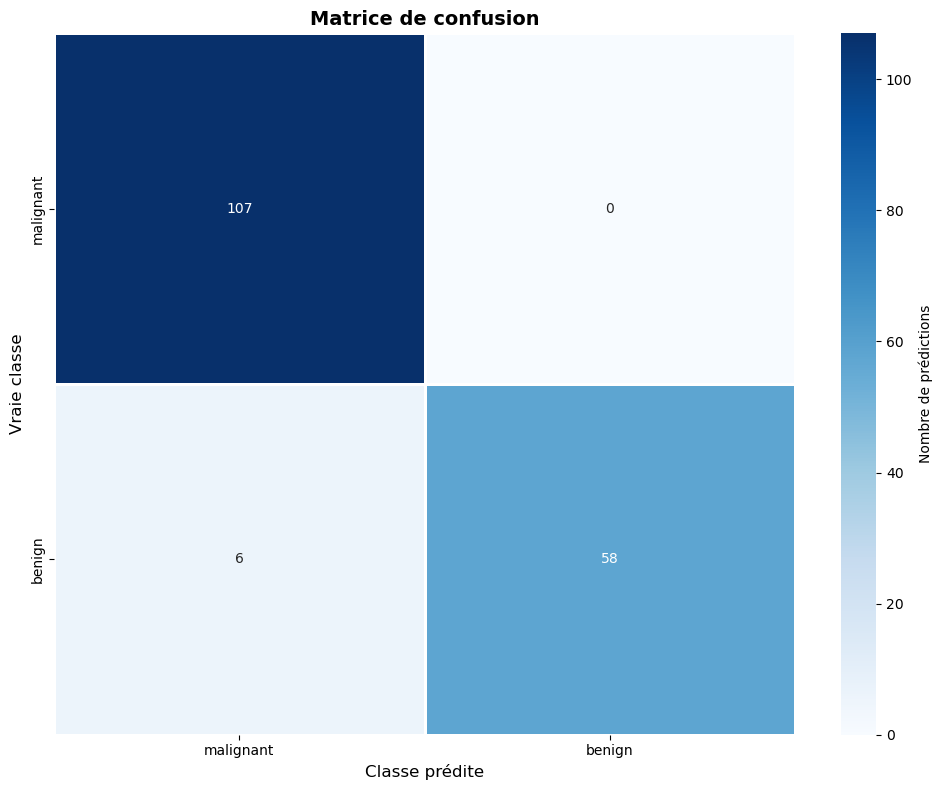

In [11]:
classification(X_train, X_test, y_train, y_test)

## Analyse des résultats
Dans un contexte médical, les faux négatifs sont particulièrement critiques parce qu’ils signifient qu’un patient malade est classé comme sain. Concrètement, cela peut retarder ou empêcher un diagnostic, donc la prise en charge et le traitement, avec des conséquences potentiellement graves, voire vitales. En machine learning médical, on préfère souvent tolérer plus de faux positifs que de rater un cas réel, car le coût humain d’un faux négatif est généralement bien plus élevé. \
La métrique la plus importante dans ce contexte est donc le recall de la classe maligne. La précision de la classe bénigne est également importante pour éviter les fausses alertes \
Accuracy non représentaive car classes désequilibré
### Logistic Regression 
* score globaux peu satisfaisant (non représentaif)
* 105/107 tumeurs malignes détéctées, recall à 0.98 -> très bien mais pas suffisant dans un contexte médicale
* 9 tumeurs bénines classées comme maline
### K neirest neigbhors 
* score globaux peu satisfaisant
* recall de malignant à 0.99, un cancer non détectée : acceptable 
* précision de benign a 0.98 : quand le modèle prédit "benign", il se trompe rarement (une erreur)
* 11 fausses alertes (benign classé malign)
* Le modèle a tendence à surclasser la classe malign (classe déséquilibré)
* Dans un contexte médical, ce modèle est viable mais à ameliorer car trop de fausses alarmes 
### Desicion Tree
* score globaux faible
* recall de malignant trop faible : 0.93
* Sur 107 tumeurs malignes, le modèle n'a pas su en détecter 7
* Sur 64 tumeurs bénines, le modèle en a predit 12 comme étant malignes
* Modèle peu performant
### Random Forest 
* score globaux satisfaisant (bien que non représentatif)
* recall de malignant à 1 : detecte tout les cancers 
* précision de benign a 1: quand le modèle prédit bénin : c'est toujours vrai
* Parfait dans un contexte médical

### Conclusion 
Random Forest est le modèle de classification le plus adapté dans cette problématique, détectant 100% des tumeurs malignes, ne se trompant jamais en indiquant une tumeur comme "bégnine", c'est le meilleur compris pour un contexte médical 